In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import csv
%matplotlib inline

In [21]:
conn = sqlite3.connect('Database/InternetSpeed.db')

In [25]:
cur = conn.cursor()

In [ ]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY random() LIMIT 10'
cur.execute(query)

In [100]:
for i in cur:
    print(i)

(60.7655169913, 39.9572213964, 46.7497555988, 33.4592730205, 61.278089363, 49.6903866035, 55.029870577, 67.2807745453, 53.7212219029, 66.0815253107, 55.6622297293, 65.8525041775, 47.2107277662, 50.6676884172, 64.9261937188, 50.3901521273, 47.8884251118, 51.6084914728, 63.5448221345, 41.5736921166, 51.7651364097, 62.5806028775, 53.7724294788, 47.834585758, 41.2344106662, 38.8510150895, 58.0120871192, 56.884295324, 50.3717855996, 28.3331729869, 60.2367420973, 64.5924932915, 33.8187620293, 58.1962714645, 65.4629003247, 35.7410156002, 22.126744406, 49.3322188084, 57.1041097321, 57.4387137482, 49.6791021761, 48.0176525754, 47.933431591, 61.5722623944, 48.3363876243, 49.4578411771, 38.2779675752, 55.6710255362, 51.1862568722, 45.5399310145, 52.210858629, 59.739632909, 62.4628006366, 65.429297066, 62.986699083, 54.3926624713, 26.2696837429, 36.8311439373, 55.330292248, 42.3352972034, 57.9885841853, 61.0763506111, 35.1367883325, 56.1313513003, 76.389617242, 46.8241142727, 45.1249275978, 42.415

1° modo de obter o valor das colunas

In [116]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [117]:
names = [i[0] for i in cur.description]

In [118]:
names.remove('DateTime')

In [119]:
names

['E07000223_p',
 'E07000026_p',
 'E07000032_p',
 'E07000224_p',
 'E07000170_p',
 'E07000105_p',
 'E07000004_p',
 'E07000200_p',
 'E09000002_p',
 'E09000003_p',
 'E08000016_p',
 'E07000027_p',
 'E07000066_p',
 'E07000084_p',
 'E07000171_p',
 'E06000022_p',
 'E06000055_p',
 'E09000004_p',
 'E08000025_p',
 'E07000129_p',
 'E06000008_p',
 'E06000009_p',
 'E07000033_p',
 'E08000001_p',
 'E07000136_p',
 'E06000028_p',
 'E06000036_p',
 'E08000032_p',
 'E07000067_p',
 'E07000143_p',
 'E09000005_p',
 'E07000068_p',
 'E06000043_p',
 'E06000023_p',
 'E07000144_p',
 'E09000006_p',
 'E07000234_p',
 'E07000095_p',
 'E07000172_p',
 'E07000117_p',
 'E08000002_p',
 'E08000033_p',
 'E07000008_p',
 'E09000007_p',
 'E07000192_p',
 'E07000106_p',
 'E07000028_p',
 'E07000069_p',
 'E06000056_p',
 'E07000130_p',
 'E07000070_p',
 'E07000078_p',
 'E07000177_p',
 'E06000049_p',
 'E06000050_p',
 'E07000034_p',
 'E07000225_p',
 'E07000005_p',
 'E07000118_p',
 'E07000048_p',
 'E09000001_p',
 'E07000071_p',
 'E07000

2° Modo de obter o valor das colunas

In [108]:
names = np.unique([i[1] for i in cur.execute('pragma table_info(LA_wifi_speed_UK)')])
np.delete(names, 0)

array(['E06000001_d', 'E06000001_p', 'E06000001_u', 'E06000002_d',
       'E06000002_p', 'E06000002_u', 'E06000003_d', 'E06000003_p',
       'E06000003_u', 'E06000004_d', 'E06000004_p', 'E06000004_u',
       'E06000005_d', 'E06000005_p', 'E06000005_u', 'E06000006_d',
       'E06000006_p', 'E06000006_u', 'E06000007_d', 'E06000007_p',
       'E06000007_u', 'E06000008_d', 'E06000008_p', 'E06000008_u',
       'E06000009_d', 'E06000009_p', 'E06000009_u', 'E06000010_d',
       'E06000010_p', 'E06000010_u', 'E06000011_d', 'E06000011_p',
       'E06000011_u', 'E06000012_d', 'E06000012_p', 'E06000012_u',
       'E06000013_d', 'E06000013_p', 'E06000013_u', 'E06000014_d',
       'E06000014_p', 'E06000014_u', 'E06000015_d', 'E06000015_p',
       'E06000015_u', 'E06000016_d', 'E06000016_p', 'E06000016_u',
       'E06000017_d', 'E06000017_p', 'E06000017_u', 'E06000018_d',
       'E06000018_p', 'E06000018_u', 'E06000019_d', 'E06000019_p',
       'E06000019_u', 'E06000020_d', 'E06000020_p', 'E06000020

1° Modo de remover os marcadores do final da string

In [109]:
for i in range(len(names)):
    if '_d' in names[i]:
        names[i] = names[i].replace('_d', '')
    elif '_u' in names[i]:
        names[i] = names[i].replace('_u', '')
    elif '_p' in names[i]:
        names[i] = names[i].replace('_p', '')

2° Modo de remover os marcadores do final da string

In [120]:
AreaNames = list(set([i[:-2] for i in names]))

In [121]:
names

['E07000223_p',
 'E07000026_p',
 'E07000032_p',
 'E07000224_p',
 'E07000170_p',
 'E07000105_p',
 'E07000004_p',
 'E07000200_p',
 'E09000002_p',
 'E09000003_p',
 'E08000016_p',
 'E07000027_p',
 'E07000066_p',
 'E07000084_p',
 'E07000171_p',
 'E06000022_p',
 'E06000055_p',
 'E09000004_p',
 'E08000025_p',
 'E07000129_p',
 'E06000008_p',
 'E06000009_p',
 'E07000033_p',
 'E08000001_p',
 'E07000136_p',
 'E06000028_p',
 'E06000036_p',
 'E08000032_p',
 'E07000067_p',
 'E07000143_p',
 'E09000005_p',
 'E07000068_p',
 'E06000043_p',
 'E06000023_p',
 'E07000144_p',
 'E09000006_p',
 'E07000234_p',
 'E07000095_p',
 'E07000172_p',
 'E07000117_p',
 'E08000002_p',
 'E08000033_p',
 'E07000008_p',
 'E09000007_p',
 'E07000192_p',
 'E07000106_p',
 'E07000028_p',
 'E07000069_p',
 'E06000056_p',
 'E07000130_p',
 'E07000070_p',
 'E07000078_p',
 'E07000177_p',
 'E06000049_p',
 'E06000050_p',
 'E07000034_p',
 'E07000225_p',
 'E07000005_p',
 'E07000118_p',
 'E07000048_p',
 'E09000001_p',
 'E07000071_p',
 'E07000

In [122]:
suffix = {'_p': 'ping', '_d': 'download', '_u': 'upload'}

In [123]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'E07000193')

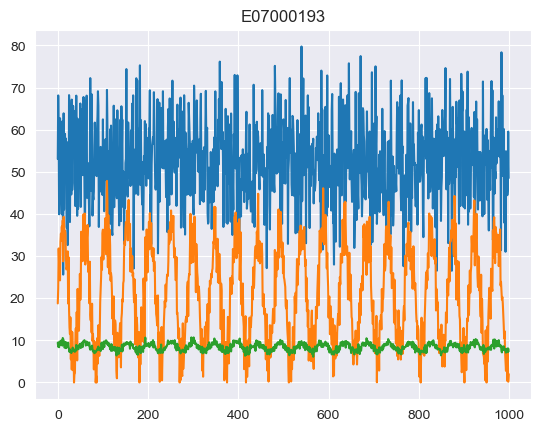

In [124]:
area = AreaNames[0]
for s in suffix.keys():
    query = f'SELECT {area}{s} FROM LA_wifi_speed_UK'
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.title(area)

In [125]:
SpeedDF = pd.DataFrame(columns=['Area', 'Average_p', 'Average_d', 'Average_u'])

In [127]:
for ar in AreaNames:
    means = [ar]
    for s in suffix.keys():
        means.append(np.mean(list(cur.execute(f'SELECT {ar}{s} FROM LA_wifi_speed_UK'))))
    means = pd.Series(dict(zip(['Area', 'Average_p', 'Average_d', 'Average_u'], means)))
    SpeedDF = pd.concat([SpeedDF, means.to_frame().T], ignore_index=True)

In [128]:
SpeedDF

,Area,Average_p,Average_d,Average_u
0,E07000193,52.306149,21.090248,8.421844
1,E09000021,52.617278,21.466897,8.592484
2,E07000180,52.459673,21.297514,8.444202
3,E07000198,51.964341,21.14011,8.341121
4,E07000164,51.929354,20.785617,8.325232
...,...,...,...,...
321,E07000026,51.618836,20.81608,8.3524
322,E09000018,54.148077,22.589704,8.933799
323,E07000229,51.795795,21.255787,8.383352
324,E07000143,51.887536,21.421846,8.495484


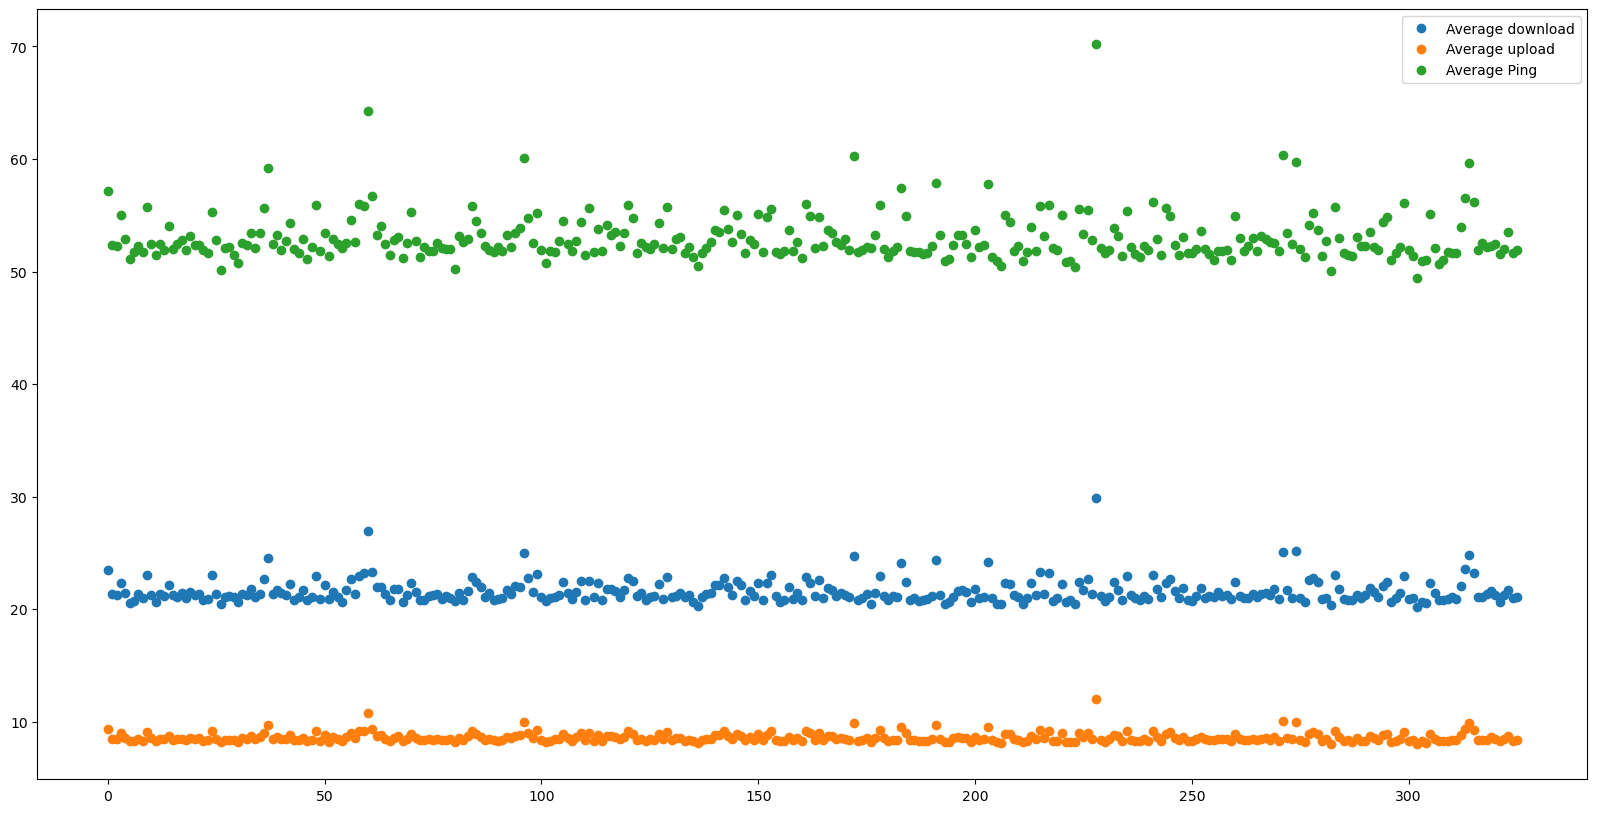

In [161]:
plt.figure(figsize=(20,10))
plt.plot(SpeedDF.index, SpeedDF[['Average_d', 'Average_u', 'Average_p']], 'o')
plt.legend(['Average download', 'Average upload', 'Average Ping'])

In [157]:
SpeedDF.index

RangeIndex(start=0, stop=326, step=1)

In [162]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

In [166]:
SpeedDF.to_sql('average_speed', conn)

ValueError: Table 'average_speed' already exists.

In [167]:
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)
print(cur.fetchone())
print(cur.fetchone())

(0, 'E06000049', 57.1189311251165, 23.482726821515023, 9.38933695300067)
(1, 'E07000144', 52.399481702976395, 21.319127204659473, 8.439453820303461)


In [177]:
query = 'SELECT * FROM LA_population'
cur.execute(query)

In [178]:
for i in range(10):
    print(cur.fetchone())

('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [263]:
query = 'CREATE TABLE CompleteTables AS SELECT * FROM average_speed INNER JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

In [264]:
cur.execute(query)

In [197]:
cur.execute('SELECT * FROM average_speed')

In [ ]:
k = 0
for row in cur:
    print(row)
    if k > 10:
        break
    k += 1

In [253]:
with open('new_table.csv', 'a') as f:
    rd = csv.writer(f)
    rd.writerow(('index', ''))
    for i in cur:
        print(i)
        rd.writerow(i)
f.close()

(0, 'E06000049', 57.1189311251165, 23.482726821515023, 9.38933695300067, 'Cheshire East', 'E06000049', 370127)
(1, 'E07000144', 52.399481702976395, 21.319127204659473, 8.439453820303461, 'Broadland', 'E07000144', 124646)
(2, 'E07000149', 52.2854237466161, 21.25067953397555, 8.46744541230226, 'South Norfolk', 'E07000149', 124012)
(3, 'E08000030', 55.0472676592317, 22.367238215239638, 8.996323128069362, 'Walsall', 'E08000030', 269323)
(4, 'E06000041', 52.92911207486941, 21.477284748725108, 8.58172027862129, 'Wokingham', 'E06000041', 154380)
(5, 'E07000068', 51.081754825359695, 20.521445374085836, 8.25983863368062, 'Brentwood', 'E07000068', 73601)
(6, 'E07000073', 51.7312779579503, 20.717082962625994, 8.30346035451389, 'Harlow', 'E07000073', 81944)
(7, 'E07000148', 52.2505110985487, 21.373443161390078, 8.483157470561892, 'Norwich', 'E07000148', 132512)
(8, 'E07000044', 51.7431834978036, 20.974790708551264, 8.306129552459, 'South Hams', 'E07000044', 83140)
(9, 'E09000006', 55.7376509361521